# 对数正态分布

## 基本概念

### 定义
若随机变量$X$的自然对数$\ln X$服从正态分布$N(\mu, \sigma^2)$，则$X$服从**对数正态分布**

### 数学定义
如果
$$Y = \ln(X) \sim N(\mu, \sigma^2)$$
则称$X$服从对数正态分布，记作
$$X \sim \text{LogNormal}(\mu, \sigma^2)$$

### 适用场景
在用户行为数据中，很多重要指标由于是严重右偏长尾分布，因此满足**对数正态**而不是**正态**

| 变量          | 是否对数正态 | 原因                   |
| ----------- | ------ | -------------------- |
| 用户购买金额（GMV） | ✅ 是    | 大部分用户消费低，少数高消费导致右偏长尾 |
| 页面停留时间      | ✅ 是    | 多数人浏览很短时间，少数人停留极久    |
| 单用户转化值（LTV） | ✅ 是    | 同样受「长尾效应」支配          |
| 会话长度        | ✅ 是    | 符合乘性增长机制             |
| 订单金额        | ✅ 是    | 电商、游戏付费中常见           |


## 概率密度函数

设$X \sim \text{LogNormal}(\mu, \sigma^2)$，
其概率密度函数为：
$$f(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), \quad x > 0$$
其中，
- $\mu$：对数均值（$\ln X$的均值）
- $\sigma$：对数标准差（$\ln X$的标准差）

## 均值与方差

**均值：**

$$E(X)=e^{\mu + \frac{\sigma^2}{2}}$$

**方差：**
$$D(X)=(e^{\sigma^2} - 1)e^{2\mu + \sigma^2}$$


## 性质

- **正偏（右偏）**: 分布尾部长，存在极端高值
- **对数可正态化**: 对数变换后为正态分布
- **乘积封闭性**: 
    - 独立变量的乘积（多个对数正态变量相乘仍为对数正态）
        - 若$X_1 \sim \text{LN}(\mu_1, \sigma_1^2)$ 和 $X_2 \sim \text{LN}(\mu_2, \sigma_2^2)$相互独立，则它们的乘积满足$X_1 \cdot X_2 \sim \text{LN}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$    
    - 与常数的乘积
        - 若$X \sim \text{Lognormal}(\mu, \sigma^2)$，则$aX \sim \text{Lognormal}(\mu + \ln a, \sigma^2)$

## 图形

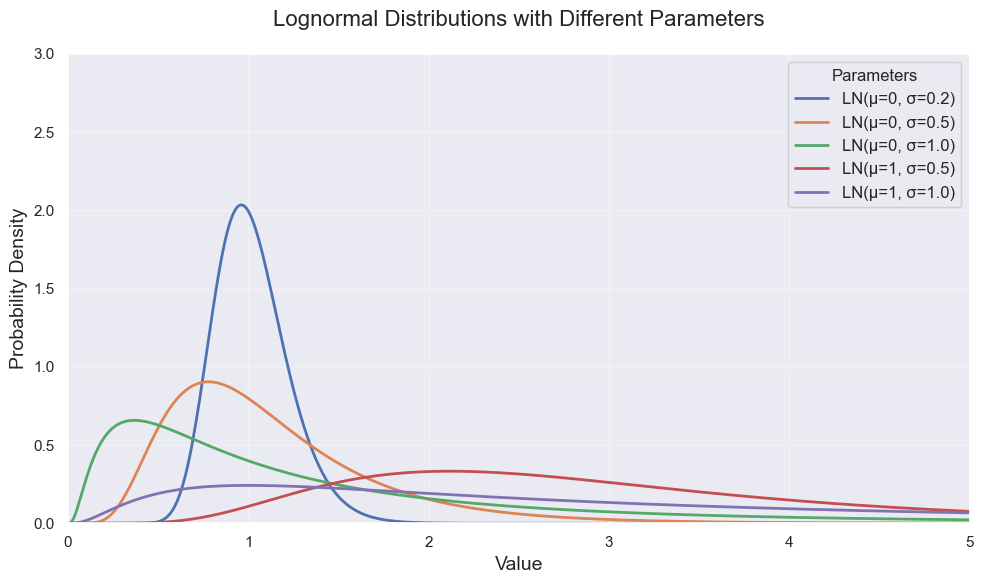

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm  # 用于对数正态分布计算
import seaborn as sns  # 用于美化图表

# ========== 图表全局设置 ==========
sns.set(style="darkgrid")  # 设置深色网格背景（学术风格）

# ========== 分布参数定义 ==========
# 参数组合 (μ, σ) 其中：
# μ: 对数均值（控制分布位置）
# σ: 对数标准差（控制分布形状）
params = [
    (0, 0.2),  # 窄峰（σ小，曲线陡峭）
    (0, 0.5),  # 中等峰度
    (0, 1.0),  # 宽峰（σ大，曲线平缓）
    (1, 0.5),  # 右移中等峰（μ增大使分布整体右移）
    (1, 1.0)   # 右移宽峰
]

# ========== 数据生成 ==========
# 生成x轴数据（严格正数，避免log(0)错误）
# np.linspace(起始值, 结束值, 点数)
x = np.linspace(0.01, 5, 500)  # 从0.01到5均匀取500个点

# ========== 绘图设置 ==========
plt.figure(figsize=(10, 6))  # 设置画布大小（宽10英寸，高6英寸）

# 循环绘制每条曲线
for mu, sigma in params:
    # 计算对数正态分布的概率密度函数(PDF)
    # scale=np.exp(mu) 是尺度参数（中位数=e^μ）
    y = lognorm.pdf(x, s=sigma, scale=np.exp(mu))
    
    # 绘制曲线
    plt.plot(
        x, y, 
        linewidth=2,  # 线宽
        label=f'LN(μ={mu}, σ={sigma})'  # 图例标签
    )

# ========== 图表修饰 ==========
# 标题和坐标轴标签
plt.title(
    'Lognormal Distributions with Different Parameters', 
    fontsize=16,  # 标题字体大小
    pad=20  # 标题与图的间距
)
plt.xlabel('Value', fontsize=14)  # x轴标签
plt.ylabel('Probability Density', fontsize=14)  # y轴标签

# 图例设置
plt.legend(
    title='Parameters',  # 图例标题
    fontsize=12,  # 图例字体大小
    framealpha=0.9  # 图例背景透明度（0-1）
)

# 网格线设置
plt.grid(alpha=0.3)  # 网格线透明度（0.3表示30%不透明）

# ========== 坐标轴范围 ==========
# 保持与F分布示例一致的坐标范围
plt.xlim(0, 5)  # x轴显示范围0-5
plt.ylim(0, 3.0)  # y轴显示范围0-3

# ========== 优化布局 ==========
plt.tight_layout()  # 自动调整子图参数（避免标签重叠）

# 显示图形
plt.show()

**核心参数影响**
   - **$\mu$（位置参数）**： 
        - $\mu=0$时曲线集中在左侧（蓝/橙/绿）
        - $\mu=1$时曲线整体右移（红/紫），体现乘性偏移特性
   - **$\sigma$（形状参数）**： 
        - $\sigma$越小（0.2）→ 曲线越陡峭（蓝线峰值最高）
        - $\sigma$越大（1.0）→ 曲线越平缓（绿/紫线尾部更宽）

**典型特征**
   - **右偏性**：所有曲线右侧有长尾，符合实际场景（如少数用户高消费）
   - **严格正值**：定义域x>0，适合建模收入/时长等非负指标
   - **峰值对比**： 
        - 最高峰：蓝线（μ=0,σ=0.2）约2.1
        - 最低峰：紫线（μ=1,σ=1.0）约0.2

# 与其他分布的关系

## 与正态分布

- **定义**：若$\ln X \sim N(\mu, \sigma^2)$，$则 X \sim \text{Lognormal}(\mu, \sigma^2)$。
- **区别**： 
    - 正态分布：对称，可负值（如误差分布）。
    - 对数正态：右偏长尾，严格正值（如收入、时长）。